In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_excel('Data.xlsx') 
df.head()

,ID_puppy,ID_litter,sex,group,breed_size,Breed,Litter_size,Dead,Age_dead,Diarr_1m,...,giar_D35_41,cocc_D35_41,giar_D42_48,cocc_D42_48,giar_D49_56,cocc_D49_56,toxo_c_D35_41,toxo_c_D42_48,toxo_l_D35_41,toxo_l_D42_48
0,10A,10L,M,EL,S,Poodle,1,1,1.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11A,11L,M,OO,S,Lhasa Apso,6,0,NaN,1,...,NaN,NaN,NaN,NaN,0.5,0.0,NaN,NaN,NaN,NaN
2,11B,11L,F,OL,S,Lhasa Apso,6,0,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11C,11L,F,OO,S,Lhasa Apso,6,1,2.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11D,11L,F,OL,S,Lhasa Apso,6,1,5.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.drop(df.columns[[0,-1,-2,-3,-4,-5,-6,-7,-8,-9,-10,-11,-12]],inplace=True,axis=1)
df = df.drop(["ID_litter","Age_dead"], axis=1)

In [5]:
df.head()

,sex,group,breed_size,Breed,Litter_size,Dead,Diarr_1m,Diarr_2m,dam_sep,weight_D0,...,Abs_CPV2_D56,PCR_CPV2_D17,PCR_CPV2_D24,PCR_CPV2_D31,PCR_CPV2_D38,PCR_CPV2_D45,PCR_CPV2_D52,fec_score_D35_41,fec_score_D42_48,fec_score_D49_56
0,M,EL,S,Poodle,1,1,0,0,NaN,232.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,M,OO,S,Lhasa Apso,6,0,1,0,9.0,NaN,...,1280.0,80.0,31.1,0.0,0.0,NaN,1.240000e+09,NaN,NaN,10.0
2,F,OL,S,Lhasa Apso,6,0,1,0,9.0,NaN,...,1280.0,45.4,111.0,26000.0,0.0,NaN,1.990000e+04,NaN,NaN,10.0
3,F,OO,S,Lhasa Apso,6,1,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,F,OL,S,Lhasa Apso,6,1,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.dtypes

sex                  object
group                object
breed_size           object
Breed                object
Litter_size           int64
Dead                  int64
Diarr_1m              int64
Diarr_2m              int64
dam_sep             float64
weight_D0           float64
weight_D1             int64
weight_D2           float64
weight_D3           float64
weight_D4           float64
weight_D7           float64
weight_D14          float64
weight_D21          float64
weight_D28          float64
weight_D35          float64
weight_D42          float64
weight_D49          float64
weight_D56          float64
IgG_dam             float64
age_dam               int64
IgG_milk_mean       float64
IgG_puppy_D2        float64
IgG_puppy_D21       float64
IgG_puppy_D28       float64
Abs_CPV2_D2         float64
Abs_CPV2_D7         float64
Abs_CPV2_D14        float64
Abs_CPV2_D21        float64
Abs_CPV2_D28        float64
Abs_CPV2_D35        float64
Abs_CPV2_D42        float64
Abs_CPV2_D49        

On rend catégoriques les variables qui sont de type object comme l'ID de la portée, le sexe, le groupe, la taille de la race et la taille de la portée.

In [7]:
df['sex']=pd.Categorical(df['sex'],ordered=False)
df['group']=pd.Categorical(df['group'],ordered=False)
df['breed_size']=pd.Categorical(df['breed_size'],ordered=False)
df['Breed']=pd.Categorical(df['Breed'],ordered=False)

In [9]:
first_column = df.pop('Dead') 
df.insert(0, 'Dead', first_column) 
df.head()

,Dead,sex,group,breed_size,Breed,Litter_size,Diarr_1m,Diarr_2m,dam_sep,weight_D0,...,Abs_CPV2_D56,PCR_CPV2_D17,PCR_CPV2_D24,PCR_CPV2_D31,PCR_CPV2_D38,PCR_CPV2_D45,PCR_CPV2_D52,fec_score_D35_41,fec_score_D42_48,fec_score_D49_56
0,1,M,EL,S,Poodle,1,0,0,NaN,232.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,M,OO,S,Lhasa Apso,6,1,0,9.0,NaN,...,1280.0,80.0,31.1,0.0,0.0,NaN,1.240000e+09,NaN,NaN,10.0
2,0,F,OL,S,Lhasa Apso,6,1,0,9.0,NaN,...,1280.0,45.4,111.0,26000.0,0.0,NaN,1.990000e+04,NaN,NaN,10.0
3,1,F,OO,S,Lhasa Apso,6,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,F,OL,S,Lhasa Apso,6,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Distance de Hamming + ET logique

In [10]:
from scipy.spatial.distance import hamming
import kmeans1d

On calcule les distances de Hamming entre les features et la vérité terrain.

In [13]:
df_dead = df['Dead']
df_num = df.drop(['sex','group','breed_size','Breed','Dead'],axis=1)
dico = {}
clusters2, centroids2 = kmeans1d.cluster(df_dead, 2)
for i in range(6):
    clusters1, centroids1 = kmeans1d.cluster(df_num[df_num.columns[i]], 2)
    dico[str(df_num.columns[i])+" - Dead"] = hamming(clusters1,clusters2) * len(clusters1)
            
{k:v for k, v in sorted(dico.items(), key=lambda item: item[1])}

{'dam_sep - Dead': 45.00000000000001,
 'weight_D0 - Dead': 45.00000000000001,
 'Litter_size - Dead': 62.0,
 'Diarr_2m - Dead': 64.0,
 'Diarr_1m - Dead': 75.0,
 'weight_D1 - Dead': 85.0}

### Données catégorielles avec le LabelEncoder

On transforme les données catégorielles en données numériques avec un LabelEncoder.

In [14]:
from sklearn.preprocessing import LabelEncoder
label_encoder =LabelEncoder()

df1=df.copy()
df1.drop('Dead', axis=1,inplace=True)
df1['group']= label_encoder.fit_transform(df['group'])
df1['Breed']= label_encoder.fit_transform(df['Breed'])
df1['breed_size']= label_encoder.fit_transform(df['breed_size'])

df1['sex'] = df['sex'].replace(to_replace={'M':1,'F':0})
df1.dtypes

sex                   int64
group                 int32
breed_size            int32
Breed                 int32
Litter_size           int64
Diarr_1m              int64
Diarr_2m              int64
dam_sep             float64
weight_D0           float64
weight_D1             int64
weight_D2           float64
weight_D3           float64
weight_D4           float64
weight_D7           float64
weight_D14          float64
weight_D21          float64
weight_D28          float64
weight_D35          float64
weight_D42          float64
weight_D49          float64
weight_D56          float64
IgG_dam             float64
age_dam               int64
IgG_milk_mean       float64
IgG_puppy_D2        float64
IgG_puppy_D21       float64
IgG_puppy_D28       float64
Abs_CPV2_D2         float64
Abs_CPV2_D7         float64
Abs_CPV2_D14        float64
Abs_CPV2_D21        float64
Abs_CPV2_D28        float64
Abs_CPV2_D35        float64
Abs_CPV2_D42        float64
Abs_CPV2_D49        float64
Abs_CPV2_D56        

### Tentative IterativeImputer

In [17]:
# explicitly require this experimental feature
from sklearn.experimental import enable_iterative_imputer  # noqa
# now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer

In [18]:
imp_mean = IterativeImputer(imputation_order="descending")
imputed = pd.DataFrame(imp_mean.fit_transform(df1), columns=df1.columns)
imputed.describe()

,sex,group,breed_size,Breed,Litter_size,Diarr_1m,Diarr_2m,dam_sep,weight_D0,weight_D1,...,Abs_CPV2_D56,PCR_CPV2_D17,PCR_CPV2_D24,PCR_CPV2_D31,PCR_CPV2_D38,PCR_CPV2_D45,PCR_CPV2_D52,fec_score_D35_41,fec_score_D42_48,fec_score_D49_56
count,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,...,169.000000,1.690000e+02,1.690000e+02,1.690000e+02,1.690000e+02,1.690000e+02,1.690000e+02,169.000000,169.000000,169.000000
mean,0.514793,1.538462,0.715976,5.775148,5.905325,0.207101,0.142012,7.732840,254.539530,254.508876,...,1148.850896,7.425606e+04,3.046625e+05,5.463829e+06,8.780284e+07,2.518442e+08,1.691199e+08,3.018778,2.315509,9.889563
std,0.501266,1.118034,0.452288,3.399453,2.079499,0.406432,0.350100,1.214797,104.807179,117.442444,...,326.556083,7.262193e+05,3.105123e+06,4.878648e+07,6.140502e+08,9.024114e+08,6.520868e+08,57.118301,46.646851,7.160463
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,5.000000,103.565418,83.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-733.797017,-552.042567,3.000000
25%,0.000000,1.000000,0.000000,3.000000,4.000000,0.000000,0.000000,7.000000,179.000000,173.000000,...,1148.852028,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.620000e+02,3.580000e+03,5.000000,4.000000,9.000000
50%,1.000000,2.000000,1.000000,6.000000,6.000000,0.000000,0.000000,7.921909,222.733232,218.000000,...,1280.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.210000e+03,6.380000e+05,4.000000e+06,8.744351,8.000000,9.874174
75%,1.000000,3.000000,1.000000,9.000000,7.000000,0.000000,0.000000,9.000000,315.140510,315.000000,...,1280.000000,1.330000e+04,2.540000e+03,7.290000e+05,8.780284e+07,2.518442e+08,1.691199e+08,9.208761,9.000000,10.000000
max,1.000000,3.000000,1.000000,11.000000,10.000000,1.000000,1.000000,9.080172,544.000000,585.000000,...,1327.014473,9.450000e+06,4.040000e+07,6.310000e+08,7.830000e+09,8.420000e+09,7.310000e+09,13.000000,12.000000,100.331700


In [19]:
df1.describe()

,sex,group,breed_size,Breed,Litter_size,Diarr_1m,Diarr_2m,dam_sep,weight_D0,weight_D1,...,Abs_CPV2_D56,PCR_CPV2_D17,PCR_CPV2_D24,PCR_CPV2_D31,PCR_CPV2_D38,PCR_CPV2_D45,PCR_CPV2_D52,fec_score_D35_41,fec_score_D42_48,fec_score_D49_56
count,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,125.000000,96.000000,169.000000,...,125.000000,1.280000e+02,1.330000e+02,1.300000e+02,1.240000e+02,1.220000e+02,1.200000e+02,77.000000,96.000000,115.000000
mean,0.514793,1.538462,0.715976,5.775148,5.905325,0.207101,0.142012,7.688000,269.770833,254.508876,...,1147.520000,7.398402e+04,3.046625e+05,5.463395e+06,8.780115e+07,2.518424e+08,1.691277e+08,8.766234,8.406250,9.182609
std,0.501266,1.118034,0.452288,3.399453,2.079499,0.406432,0.350100,1.393626,121.132331,117.442444,...,379.759381,8.352569e+05,3.503051e+06,5.567488e+07,7.176389e+08,1.063326e+09,7.747946e+08,1.925563,2.292221,1.804393
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,5.000000,109.000000,83.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000,2.000000,3.000000
25%,0.000000,1.000000,0.000000,3.000000,4.000000,0.000000,0.000000,7.000000,168.750000,173.000000,...,1280.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.395000e+02,1.182500e+03,8.000000,7.000000,8.000000
50%,1.000000,2.000000,1.000000,6.000000,6.000000,0.000000,0.000000,8.000000,233.500000,218.000000,...,1280.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.033500e+02,8.075000e+03,1.460000e+04,9.000000,9.000000,9.000000
75%,1.000000,3.000000,1.000000,9.000000,7.000000,0.000000,0.000000,9.000000,365.500000,315.000000,...,1280.000000,0.000000e+00,1.710000e+01,3.590000e+01,3.740000e+03,6.295000e+06,8.760000e+06,10.000000,10.000000,11.000000
max,1.000000,3.000000,1.000000,11.000000,10.000000,1.000000,1.000000,9.000000,544.000000,585.000000,...,1280.000000,9.450000e+06,4.040000e+07,6.310000e+08,7.830000e+09,8.420000e+09,7.310000e+09,13.000000,12.000000,12.000000


In [20]:
imputed.isnull().sum()

sex                 0
group               0
breed_size          0
Breed               0
Litter_size         0
Diarr_1m            0
Diarr_2m            0
dam_sep             0
weight_D0           0
weight_D1           0
weight_D2           0
weight_D3           0
weight_D4           0
weight_D7           0
weight_D14          0
weight_D21          0
weight_D28          0
weight_D35          0
weight_D42          0
weight_D49          0
weight_D56          0
IgG_dam             0
age_dam             0
IgG_milk_mean       0
IgG_puppy_D2        0
IgG_puppy_D21       0
IgG_puppy_D28       0
Abs_CPV2_D2         0
Abs_CPV2_D7         0
Abs_CPV2_D14        0
Abs_CPV2_D21        0
Abs_CPV2_D28        0
Abs_CPV2_D35        0
Abs_CPV2_D42        0
Abs_CPV2_D49        0
Abs_CPV2_D56        0
PCR_CPV2_D17        0
PCR_CPV2_D24        0
PCR_CPV2_D31        0
PCR_CPV2_D38        0
PCR_CPV2_D45        0
PCR_CPV2_D52        0
fec_score_D35_41    0
fec_score_D42_48    0
fec_score_D49_56    0
dtype: int

## Feature Selection

### Divison du dataset en 2 sous parties

In [21]:
imputed=imputed.join(df_dead)
imputed.head()

,sex,group,breed_size,Breed,Litter_size,Diarr_1m,Diarr_2m,dam_sep,weight_D0,weight_D1,...,PCR_CPV2_D17,PCR_CPV2_D24,PCR_CPV2_D31,PCR_CPV2_D38,PCR_CPV2_D45,PCR_CPV2_D52,fec_score_D35_41,fec_score_D42_48,fec_score_D49_56,Dead
0,1.0,0.0,1.0,9.0,1.0,0.0,0.0,7.741084,232.000000,223.0,...,74256.057204,304662.509891,5.463829e+06,8.780284e+07,2.518442e+08,1.691199e+08,3.022447,2.312969,9.891443,1
1,1.0,3.0,1.0,6.0,6.0,1.0,0.0,9.000000,162.897621,167.0,...,80.000000,31.100000,0.000000e+00,0.000000e+00,2.515802e+08,1.240000e+09,9.313078,7.396161,10.000000,0
2,0.0,2.0,1.0,6.0,6.0,1.0,0.0,9.000000,174.902364,165.0,...,45.400000,111.000000,2.600000e+04,0.000000e+00,2.519131e+08,1.990000e+04,8.987684,8.522850,10.000000,0
3,0.0,3.0,1.0,6.0,6.0,0.0,0.0,7.764997,188.176330,182.0,...,74256.057204,304662.509891,5.463829e+06,8.780284e+07,2.518442e+08,1.691199e+08,3.024186,2.313318,9.894039,1
4,0.0,2.0,1.0,6.0,6.0,0.0,0.0,7.921909,184.310856,178.0,...,74256.057204,304662.509892,5.463829e+06,8.780284e+07,2.518442e+08,1.691199e+08,3.052847,2.329819,9.872781,1


In [22]:
S=1
# Chiots de petite race
df_S = imputed[imputed['breed_size']==1]
df_S=df_S.drop("breed_size",1)
# Chiots de grande race
df_L = imputed[imputed['breed_size']==0]
df_L=df_L.drop("breed_size",1)

### Filter

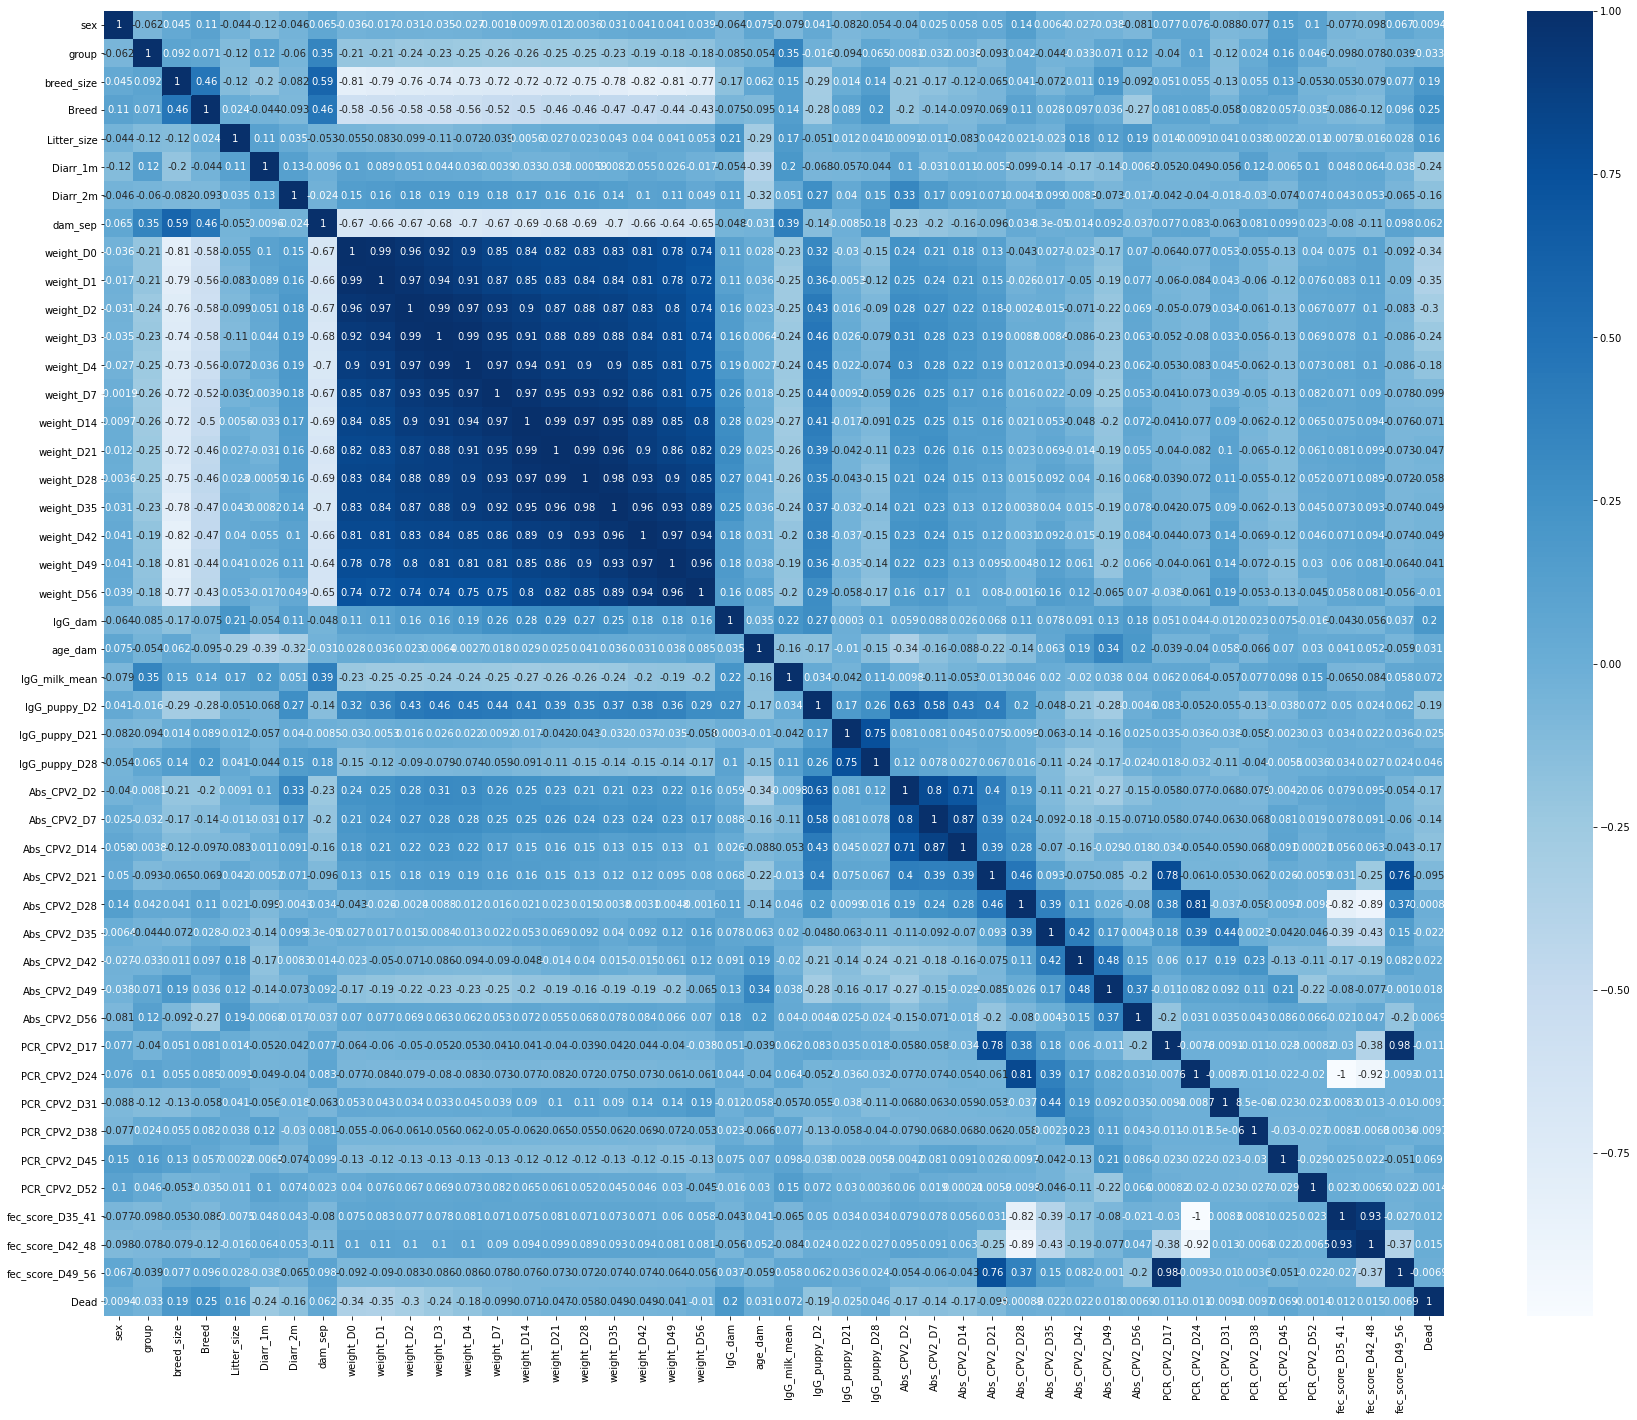

In [23]:
plt.figure(figsize=(30,24))
corr=imputed.corr()
sns.heatmap(corr, annot=True, cmap=plt.cm.Blues)
plt.show()

Pas exploitable

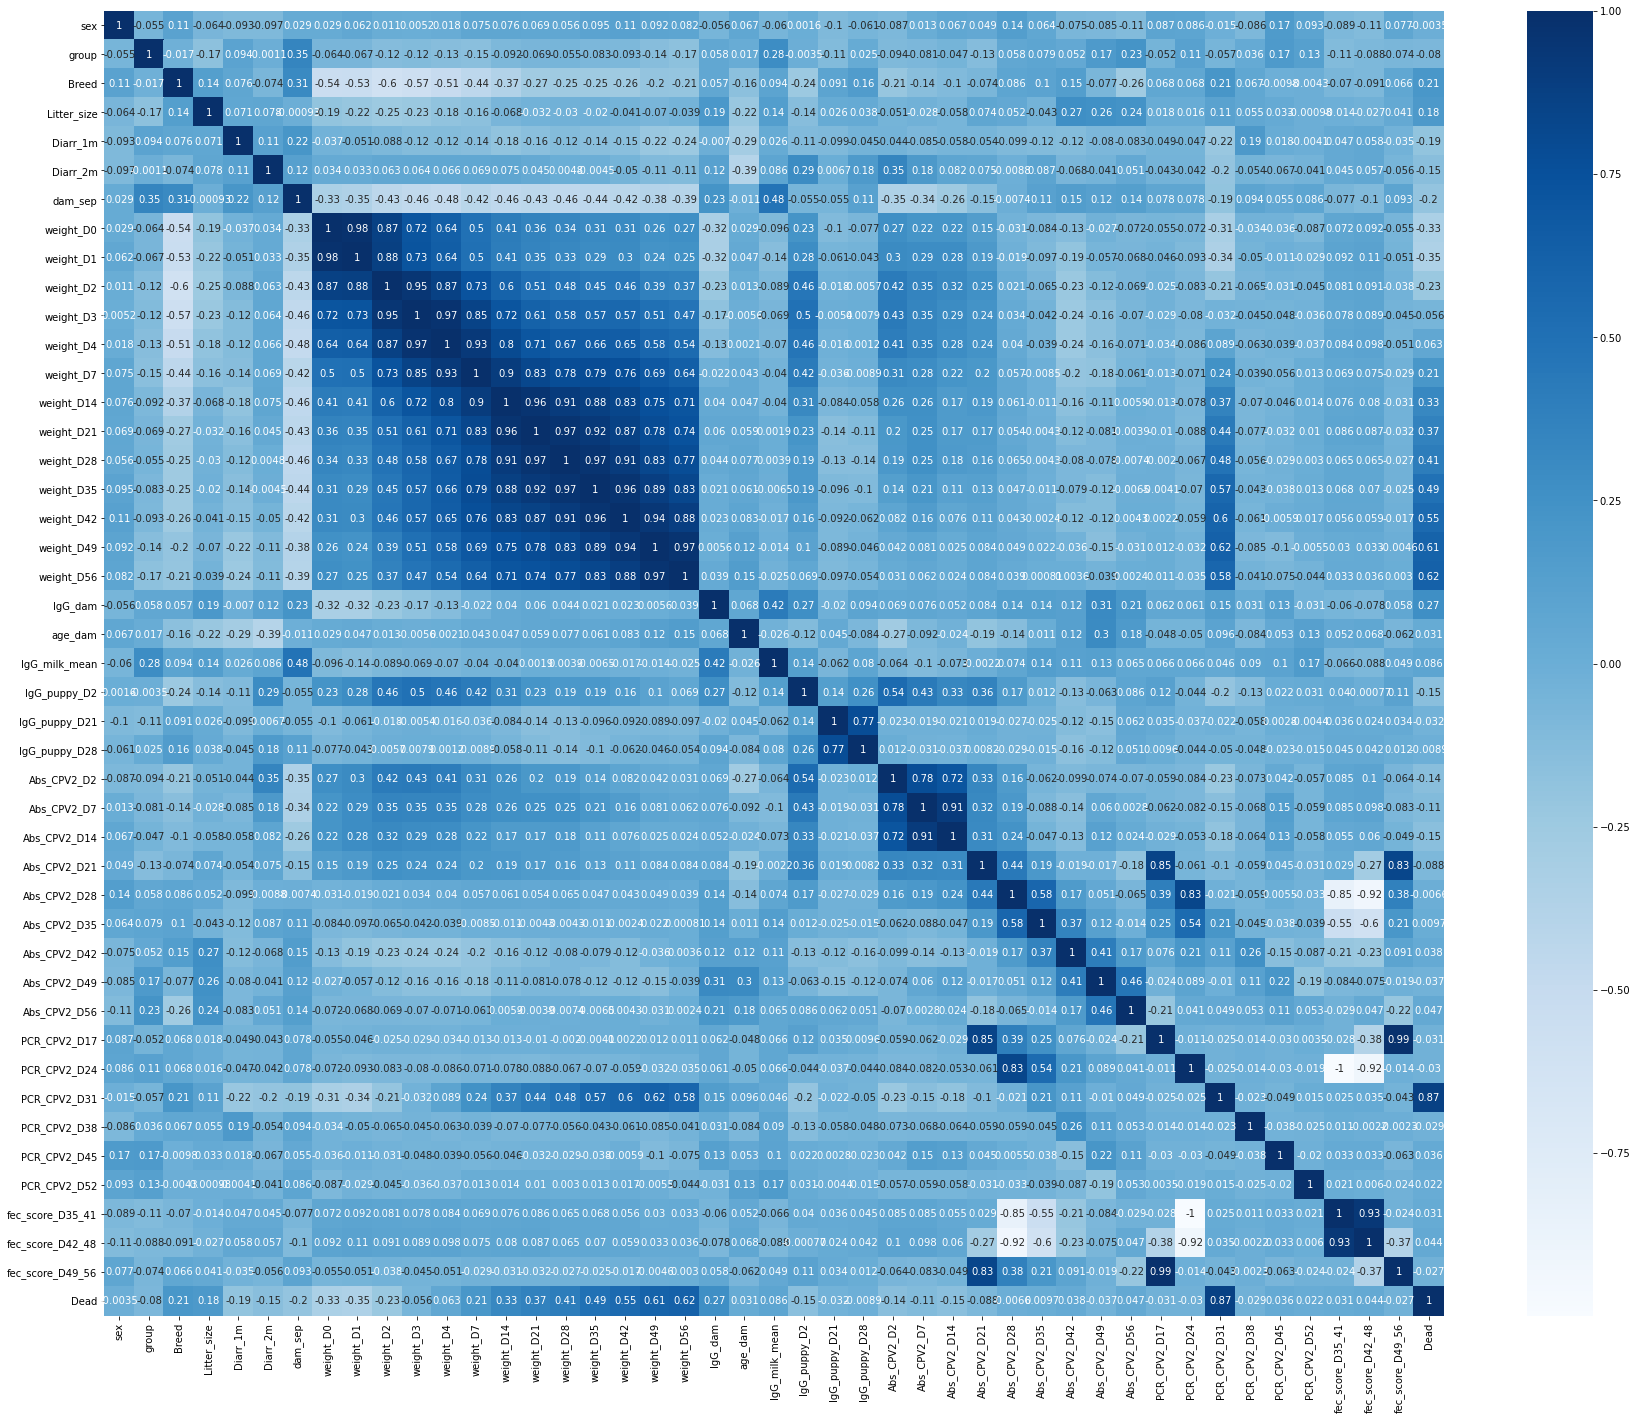

In [24]:
#Race de petite taille

plt.figure(figsize=(30,24))
corr=df_S.corr()
sns.heatmap(corr, annot=True, cmap=plt.cm.Blues)
plt.show()

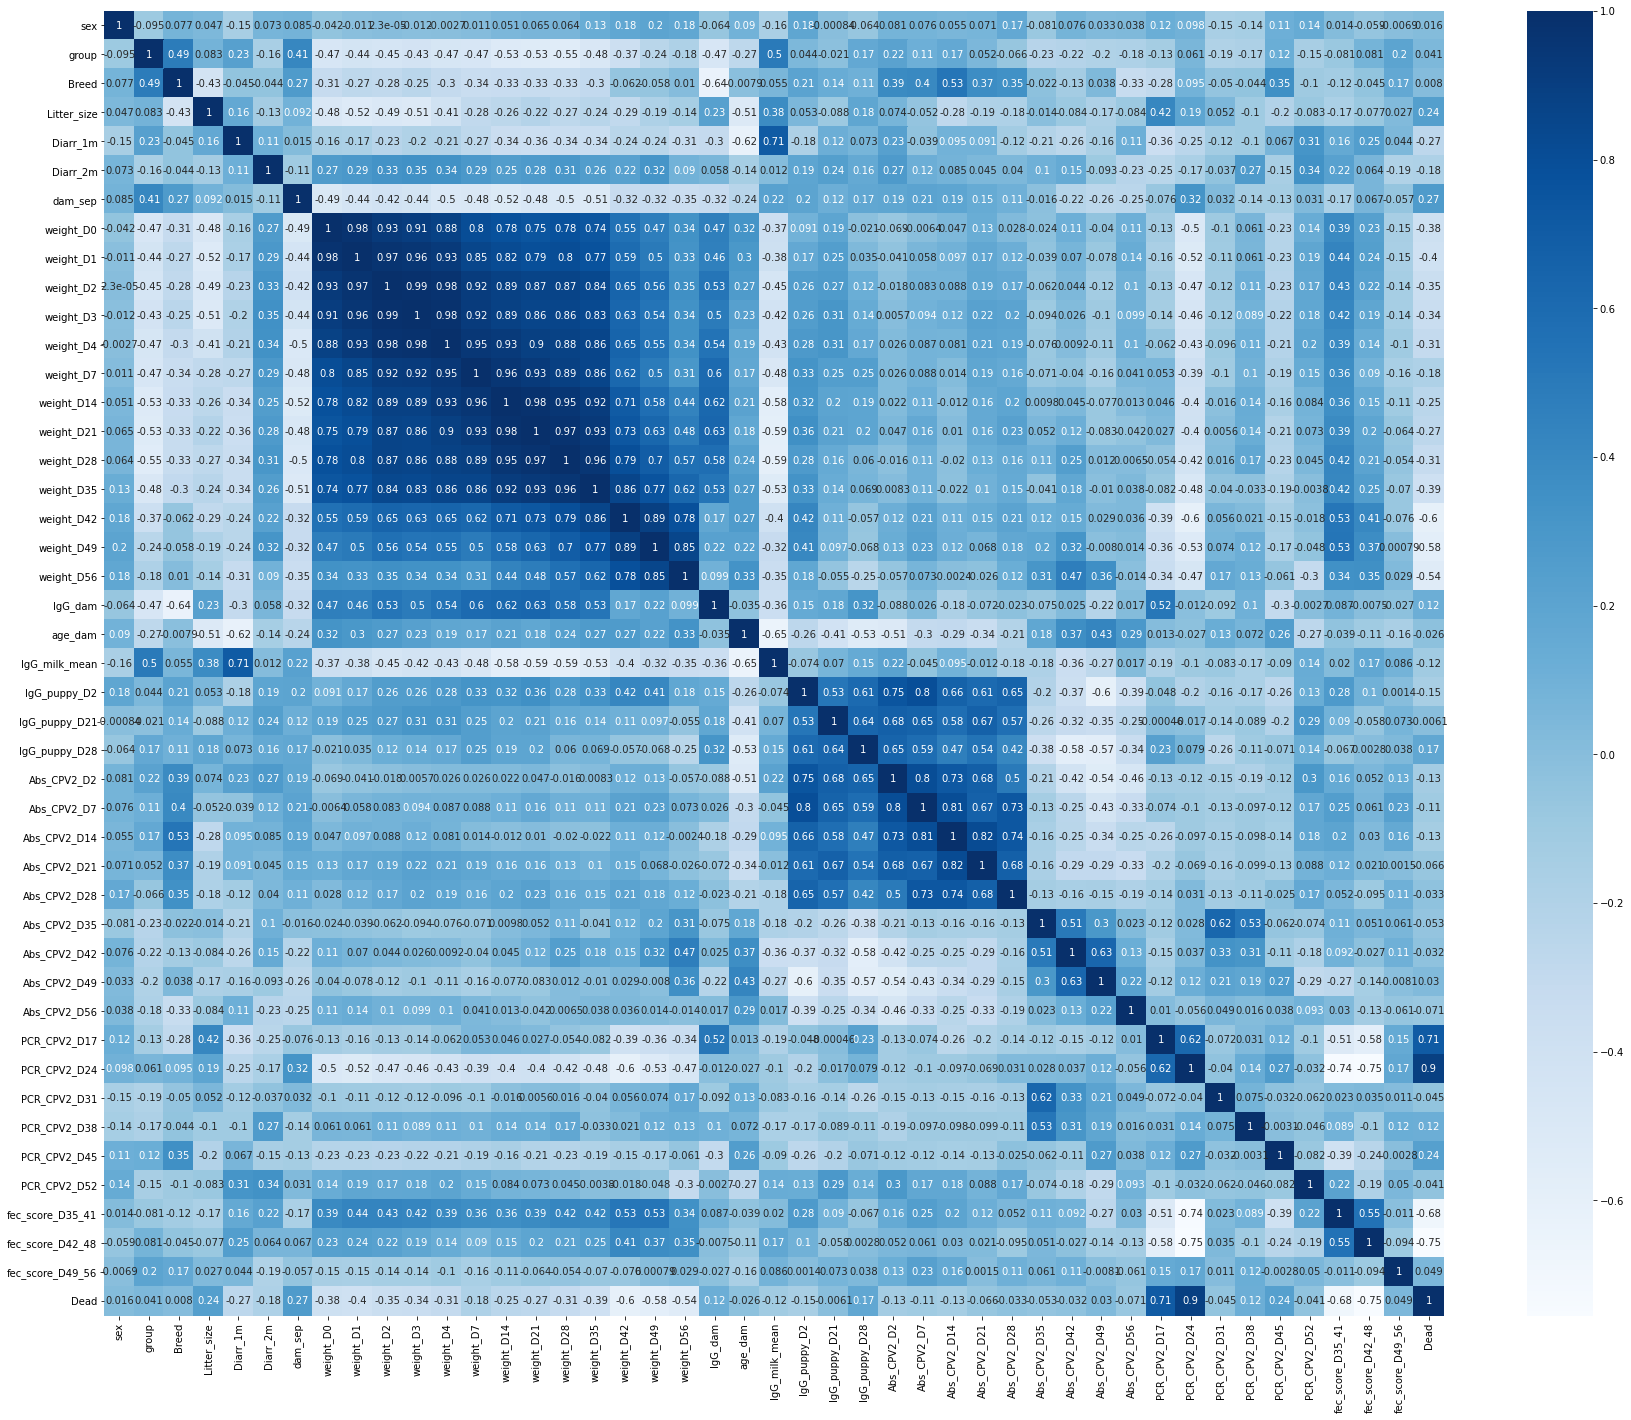

In [25]:
#Race de petite taille

plt.figure(figsize=(30,24))
corr=df_L.corr()
sns.heatmap(corr, annot=True, cmap=plt.cm.Blues)
plt.show()

### WRAPPER
#### Dataset Complet

In [26]:
#importing the necessary libraries
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')


X = imputed.drop("Dead",1) # feature matrix
y = df_dead # target feature

# Sequential Forward Selection(sfs)
sfs = SFS(LogisticRegression(),
          k_features=5,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)

sfs.fit(X,y)
print('Régression logistique :')
sfs.k_feature_names_

Régression logistique :


('breed_size', 'weight_D0', 'weight_D49', 'IgG_milk_mean', 'IgG_puppy_D2')

#### Dataset race petite taille

In [27]:
y = df_S["Dead"] # target feature
X = df_S.drop("Dead",1) # feature matrix

# Sequential Forward Selection(sfs)
sfs = SFS(LogisticRegression(),
          k_features=5,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)

sfs.fit(X,y)
print('Régression logistique :')
sfs.k_feature_names_

Régression logistique :


('group', 'Diarr_2m', 'weight_D0', 'weight_D49', 'Abs_CPV2_D14')

#### Dataset race de grande taille

In [28]:
y = df_L["Dead"] # target feature
X = df_L.drop("Dead",1) # feature matrix

# Sequential Forward Selection(sfs)
sfs = SFS(LogisticRegression(),
          k_features=4,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)

sfs.fit(X,y)
print('Régression logistique :')
sfs.k_feature_names_

Régression logistique :


('sex', 'Breed', 'weight_D2', 'weight_D49')

### Embedded

#### Dataset Complet

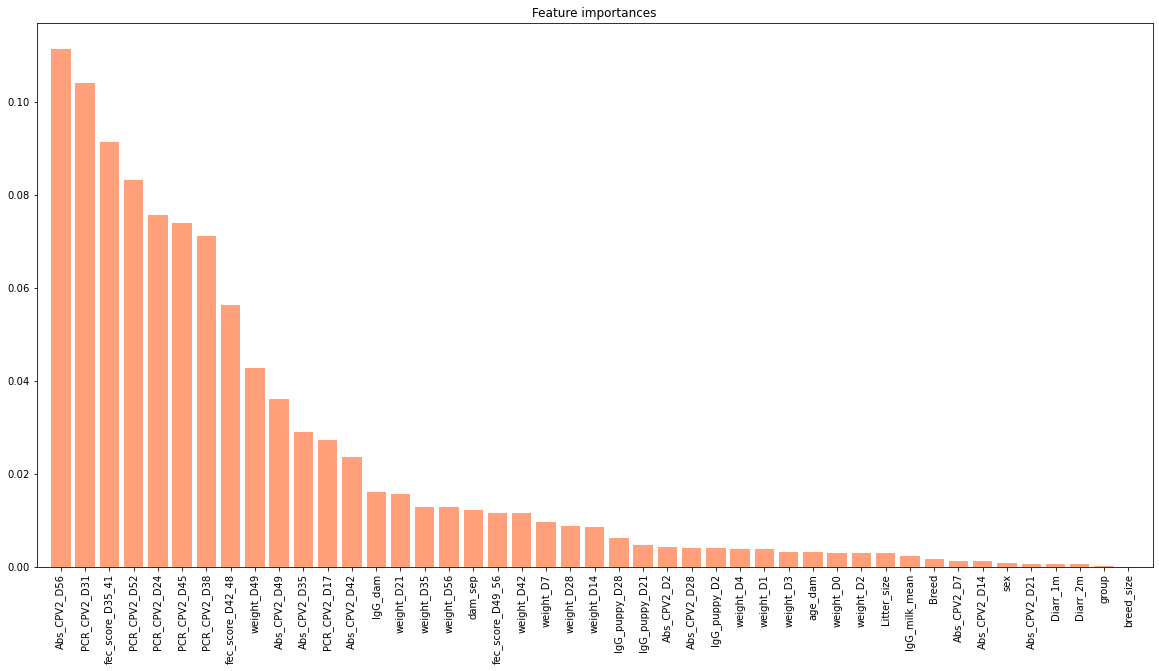

In [29]:
from sklearn.ensemble import RandomForestClassifier
X = imputed.drop("Dead",1) # feature matrix
y = imputed["Dead"] # target feature

rf = RandomForestClassifier(n_estimators = 100, 
                            class_weight='balanced', random_state=42)

rf.fit(X, y)

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(20,10))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="lightsalmon", align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

#### Dataset Race de petite taille

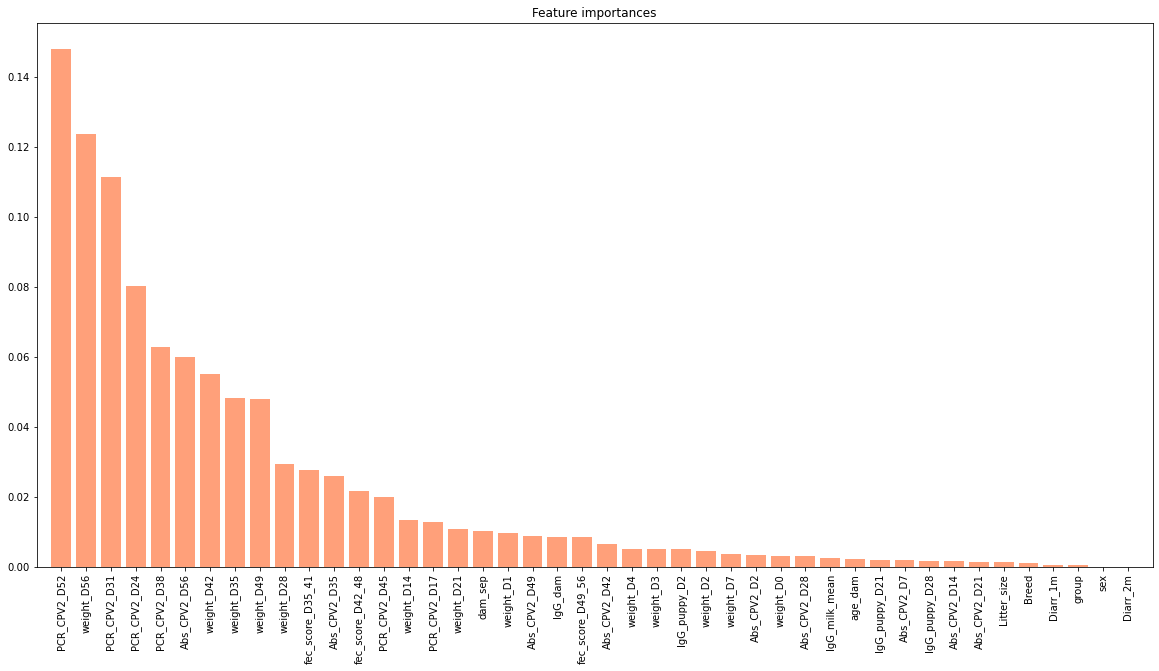

In [30]:
from sklearn.ensemble import RandomForestClassifier
X = df_S.drop("Dead",1) # feature matrix
y = df_S["Dead"] # target feature

rf = RandomForestClassifier(n_estimators = 100, 
                            class_weight='balanced', random_state=42)

rf.fit(X, y)

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(20,10))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="lightsalmon", align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

#### Dataset Race de grande taille

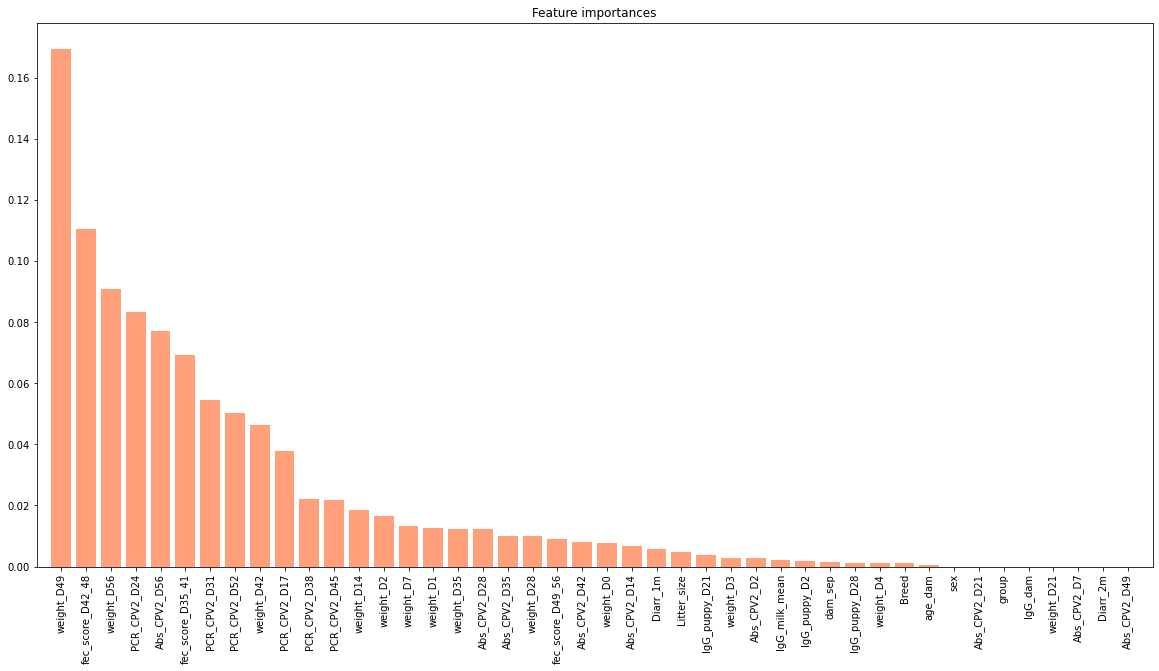

In [31]:
from sklearn.ensemble import RandomForestClassifier
X = df_L.drop("Dead",1) # feature matrix
y = df_L["Dead"] # target feature

rf = RandomForestClassifier(n_estimators = 100, 
                            class_weight='balanced', random_state=42)

rf.fit(X, y)

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(20,10))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="lightsalmon", align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()